In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [26]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)

# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [27]:
# Implement the K-means algorithm

def initialize_centroids(data, k):
    # Initialize the centroids randomly
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def compute_distances(data, centroids):
    # Compute the distance between each data point and each centroid
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i in range(centroids.shape[0]):
        distances[:, i] = np.linalg.norm(data - centroids[i], axis=1)
    return distances

def assign_clusters(distances):
    # Assign each data point to the closest centroid
    return np.argmin(distances, axis=1)

def update_centroids(data, clusters, k):
    # Compute the new centroids as the mean of the data points assigned to each cluster
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(data[clusters == i], axis=0)
    return centroids

def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iteration in range(max_iterations):
        old_centroids = centroids.copy()
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        centroids = update_centroids(data, clusters, k)
        if np.all(old_centroids == centroids):
            break
    return centroids, clusters     

In [28]:
# Evaluate the results

k = 4

centroids, clusters = k_means(data_scaled, k)

 # Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print('WCSS:', wcss)

WCSS: 17.46619760906058


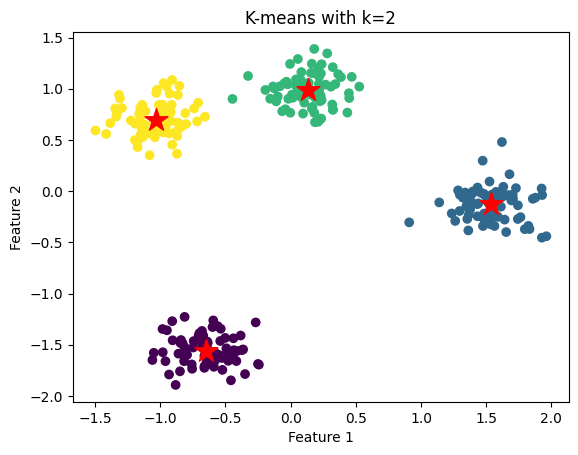

In [29]:
# Visualize the clusters

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means with k=2')
plt.show()

In [30]:
# Implement K-medoids

def initialize_medoids(data, k):
    # Initialize the medoids as random samples
    medoids = data.copy()
    np.random.shuffle(medoids)
    return medoids[:k]

def compute_dissimilarities(data, medoids):
    # Compute the dissimilarity (distance) between each data point and each medoid
    dissimilarities = np.zeros((data.shape[0], medoids.shape[0]))
    for i in range(medoids.shape[0]):
        dissimilarities[:, i] = np.linalg.norm(data - medoids[i], axis=1)
    return dissimilarities

def assign_clusters(dissimilarities):
    # Assign each data point to the cluster of the closest medoid
    return np.argmin(dissimilarities, axis=1)

def update_medoids(data, clusters, k):
    # Compute the new medoids as the sample in each cluster that minimizes the total dissimilarity
    medoids = np.zeros((k, data.shape[1]))
    for i in range(k):
        medoids[i] = np.mean(data[clusters == i], axis=0)
    return medoids

def k_medoids(data, k, max_iterations=100):
    medoids = initialize_medoids(data, k)
    for iteration in range(max_iterations):
        old_medoids = medoids.copy()
        dissimilarities = compute_dissimilarities(data, medoids)
        clusters = assign_clusters(dissimilarities)
        medoids = update_medoids(data, clusters, k)
        if np.all(old_medoids == medoids):
            break
    return medoids, clusters

In [31]:
# Evaluate the results

k = 8

medoids, clusters = k_medoids(data_scaled, k)

# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] - medoids[i])) for i in range(k)])
print('WCSS:', wcss)

WCSS: 12.411588085641286


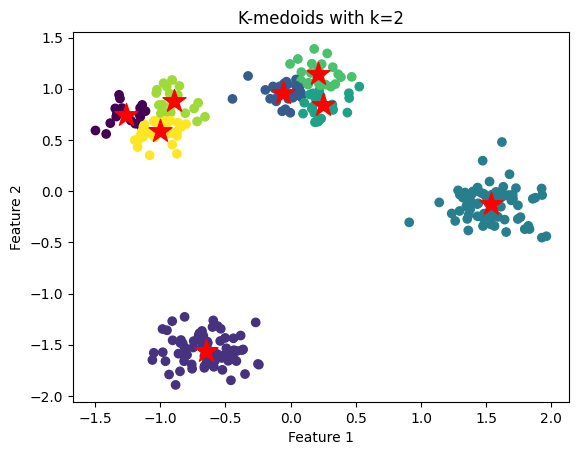

In [32]:
# Visualize the clusters

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters)
plt.scatter(medoids[:, 0], medoids[:, 1], marker='*', s=300, c='r')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-medoids with k=2')
plt.show()